In [10]:
import os
import sys

### INIT DJANGO-GEO-SPAAS
src_dir = os.getcwd().split('nansat-lectures')[0]
os.environ['DJANGO_SETTINGS_MODULE'] = 'project.settings'
sys.path.insert(0, os.path.join(src_dir, 'django-geo-spaas', 'project'))
import django
django.setup()

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from nansat import Nansat, Domain, NSR
from geospaas.catalog.models import Dataset, DatasetURI
%matplotlib notebook

In [12]:
# find GlobCurrent data
uris = DatasetURI.objects.filter(dataset__entry_title__contains='globcurrent')

In [13]:
for uri in uris:
    print uri.uri

http://www.ifremer.fr/opendap/cerdap1/globcurrent/v2.0/global_012_deg/geostrophic/2010/001/20100101000000-GLOBCURRENT-L4-CURgeo_0m-ALT_OI-v02.0-fv01.0.nc
http://www.ifremer.fr/opendap/cerdap1/globcurrent/v2.0/global_012_deg/geostrophic/2010/002/20100102000000-GLOBCURRENT-L4-CURgeo_0m-ALT_OI-v02.0-fv01.0.nc
http://www.ifremer.fr/opendap/cerdap1/globcurrent/v2.0/global_012_deg/geostrophic/2010/074/20100315000000-GLOBCURRENT-L4-CURgeo_0m-ALT_OI-v02.0-fv01.0.nc


In [14]:
n = Nansat(uris[0].uri)
d = Domain(NSR().wkt, '-te -80 25 -60 45 -tr 0.125 0.125')
n.reproject(d, addmask=False)
u = n['eastward_geostrophic_current_velocity']
v = n['northward_geostrophic_current_velocity']

<IPython.core.display.Javascript object>


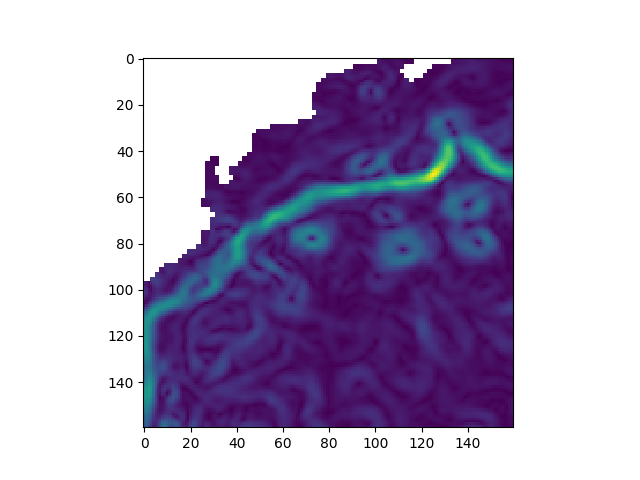

In [15]:
plt.figure()
plt.imshow(np.hypot(u, v))